In [1]:
import torch
import torchaudio
from nnAudio import features
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import lightning.pytorch as pl
from lightning.pytorch.loggers import TensorBoardLogger
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio
from IPython.display import clear_output, display
import librosa
import math
import datetime
import time
import numpy as np
import random

#Eigene Sachen
from train import *
from data.data import *
from util.util import *
from util.helper import *
from util.datasets import *
from util.audio_processing import *
import util.plot as plot
import util.metric as metric
import models
import tqdm

In [2]:
model = models.CNN.load_from_checkpoint(
    #Pfad
    checkpoint_path = r"./lightning_logs/CNN/version_0/checkpoints/last.ckpt",
    
    #Params
    channels = 64,
)

#CPU
model = model.cpu()

In [5]:
x,y = speakdataset_test_unchunked_normalized[0]

In [14]:
samples = get_samples(x, librosa.time_to_samples(times=0.4,sr=SAMPLE_RATE), hop_length=HOP_LENGTH)
dbfs = db(samples)
target = -23
error = target - dbfs
gain = error

In [21]:
torch.concat([torch.zeros(1),gain]).shape

torch.Size([428])

Durchschnittl. Genauigkeit: 79.95


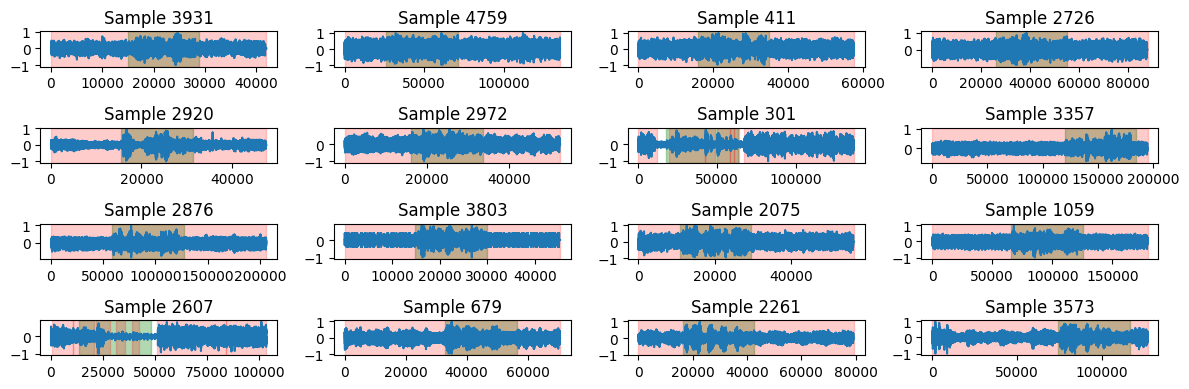

In [3]:
#CNN 512 Samples Peak normalisierung
result    = test_model(model, normalized_dataset = True)
average   = np.average([item["acc"] for item in result])
print(f"Durchschnittl. Genauigkeit: {average * 100 :.2f}")

sample_idx = [item["idx"] for item in result[:16]]
plot.plot_model(sample_idx, dataset_test_normalized, model)

In [4]:
#CNN 512 Samples Keine Normalisierung
result    = test_model(model, normalized_dataset = False)
average   = np.average([item["acc"] for item in result])
print(f"Durchschnittl. Genauigkeit: {average * 100 :.2f}")

Durchschnittl. Genauigkeit: 79.43


Durchschnittl. Genauigkeit: 79.95


KeyboardInterrupt: 

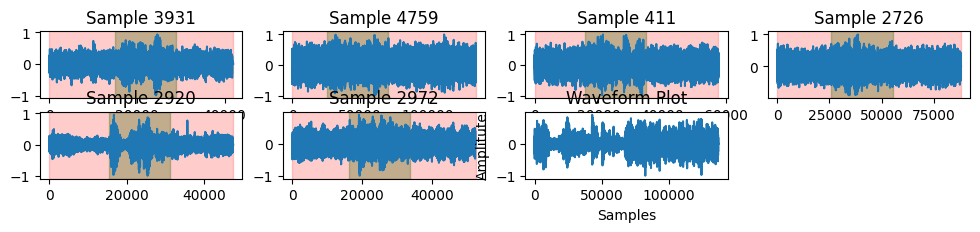

In [3]:
#CNN 512 Samples FFLN Normalisierung
result    = test_model(model, normalized_dataset = True)
average   = np.average([item["acc"] for item in result])
print(f"Durchschnittl. Genauigkeit: {average * 100 :.2f}")

sample_idx = [item["idx"] for item in result[:16]]
plot.plot_model(sample_idx, dataset_test_normalized, model)

In [ ]:
#
model = models.CNN.load_from_checkpoint(
    #Pfad
    checkpoint_path = r"./lightning_logs/CNN_CONTEXT_LENGTH-1536/version_0/checkpoints/last.ckpt",
    
    #Params
    channels = 64,
)

#CPU
model = model.cpu()

In [1]:
#Lädt Model
model = models.CNN(channels=64)
#model = models.DeepCNN(n_blocks=2)

#compiled_model = torch.compile(model) -> does leed to bugs -> update dependencies?

train_model(model, max_epochs=2)

NameError: name 'models' is not defined

In [6]:
result = test_model(model)
batch_idx = [item["batch_idx"] for item in result[:16]]
plot.plot_model(batch_idx, dataset_test, model)